In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, Bidirectional, LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [13]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Bering = pd.read_excel(filepath, sheet_name='Bering-Extent-km^2')

In [14]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [15]:
fp.month_mapping(Bering)
fp.date_time(Bering)

,Extent,Date
0,320266.650,1979-01-01
1,541778.338,1979-02-01
2,638262.988,1979-03-01
3,423025.159,1979-04-01
4,215587.216,1979-05-01
...,...,...
488,317377.493,2023-05-01
489,39601.476,2023-06-01
490,16935.702,2023-07-01
491,1305.744,2023-09-01


In [16]:
fp.plot_df(Bering)

In [17]:
scaler = MinMaxScaler()
Bering['Extent'] = scaler.fit_transform(Bering['Extent'].values.reshape(-1, 1))

In [18]:
extent = Bering['Extent']
W_S=12
X,y = fp.df_to_X_y(extent, W_S)
X.shape, y.shape

((481, 12, 1), (481,))

In [19]:
X_train, y_train = X[:384], y[:384]
X_val, y_val = X[384:432], y[384:432]
X_test, y_test = X[432:], y[432:]

In [9]:
model = Sequential()
model.add(InputLayer((W_S, 1)))
model.add(Bidirectional(LSTM(128, activation='relu', kernel_constraint=MaxNorm(1.0), return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, activation='relu', kernel_constraint=MaxNorm(1.0), return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32, activation='relu', kernel_constraint=MaxNorm(1.0))))
model.add(Dense(1, activation='linear'))

cp = ModelCheckpoint('Bering_model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [10]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
48/48 [==============================] - 35s 553ms/step - loss: 0.1546 - root_mean_squared_error: 0.3932 - val_loss: 0.0493 - val_root_mean_squared_error: 0.2221
Epoch 2/50
48/48 [==============================] - 26s 543ms/step - loss: 0.0946 - root_mean_squared_error: 0.3076 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1978
Epoch 3/50
48/48 [==============================] - 24s 510ms/step - loss: 0.0738 - root_mean_squared_error: 0.2717 - val_loss: 0.0359 - val_root_mean_squared_error: 0.1896
Epoch 4/50
48/48 [==============================] - 26s 543ms/step - loss: 0.0576 - root_mean_squared_error: 0.2400 - val_loss: 0.0253 - val_root_mean_squared_error: 0.1592
Epoch 5/50
48/48 [==============================] - 27s 565ms/step - loss: 0.0398 - root_mean_squared_error: 0.1994 - val_loss: 0.0146 - val_root_mean_squared_error: 0.1210
Epoch 6/50
48/48 [==============================] - 26s 545ms/step - loss: 0.0300 - root_mean_squared_error: 0.1732 - val_loss: 0.0140 

Epoch 39/50
48/48 [==============================] - 3s 70ms/step - loss: 0.0096 - root_mean_squared_error: 0.0979 - val_loss: 0.0123 - val_root_mean_squared_error: 0.1109
Epoch 40/50
48/48 [==============================] - 3s 63ms/step - loss: 0.0093 - root_mean_squared_error: 0.0965 - val_loss: 0.0135 - val_root_mean_squared_error: 0.1162
Epoch 41/50
48/48 [==============================] - 3s 71ms/step - loss: 0.0094 - root_mean_squared_error: 0.0971 - val_loss: 0.0128 - val_root_mean_squared_error: 0.1130
Epoch 42/50
48/48 [==============================] - 3s 58ms/step - loss: 0.0093 - root_mean_squared_error: 0.0966 - val_loss: 0.0166 - val_root_mean_squared_error: 0.1289
Epoch 43/50
48/48 [==============================] - 3s 62ms/step - loss: 0.0096 - root_mean_squared_error: 0.0980 - val_loss: 0.0160 - val_root_mean_squared_error: 0.1266
Epoch 44/50
48/48 [==============================] - 3s 67ms/step - loss: 0.0092 - root_mean_squared_error: 0.0958 - val_loss: 0.0110 - val_

In [11]:
time = (etime - stime)/60
print(f'{time} minutes')

7.368467915058136 minutes


In [12]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

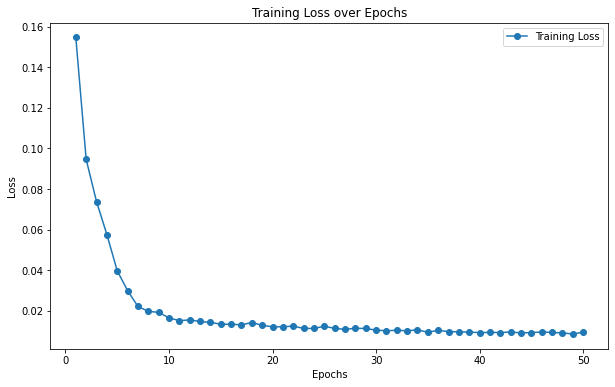

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

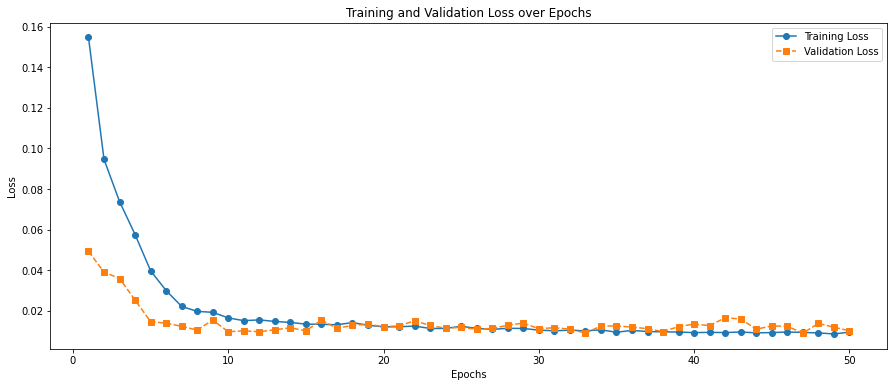

In [14]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

In [20]:
from tensorflow.keras.models import load_model
model1 = load_model('Bering_model/')

In [21]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 2s 12ms/step


In [22]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

mae = mean_absolute_error(y_test, test_predictions)
print('MAE :', mae)

RMSE : 0.08783593773846066
MAE : 0.0612327174669996


In [23]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

In [24]:
train_results = pd.DataFrame(data={'Train Predictions': test_predictions.flatten(), 'Actual Extent': test_original.flatten()})
train_results

,Train Predictions,Actual Extent
0,14337.159180,64252.220
1,-9582.773438,32185.203
2,-12983.713867,2490.551
3,-10706.063477,1707.377
4,575.368225,11293.282
5,36085.191406,49957.406
6,154606.250000,151973.751
7,382342.031250,466524.938
8,506422.437500,708542.184
9,314283.875000,652598.000


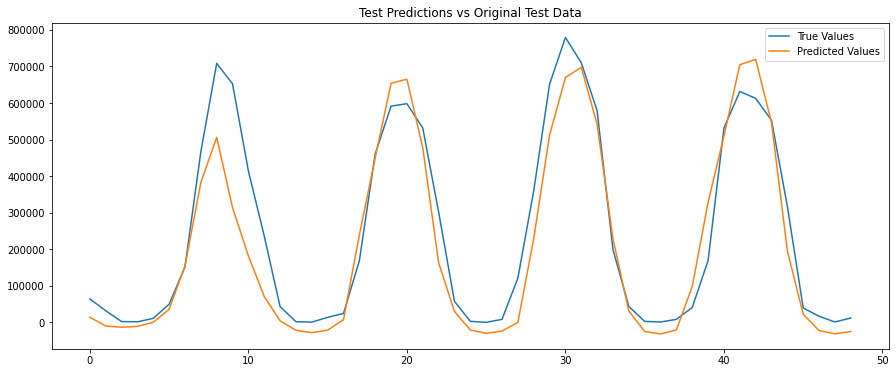

In [25]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

In [26]:
predictions = model1.predict(X)

16/16 [==============================] - 0s 15ms/step


In [27]:
mse = mean_squared_error(y, predictions)
print(mse)

0.008549249292661739


In [28]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.06759788994623765


In [29]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

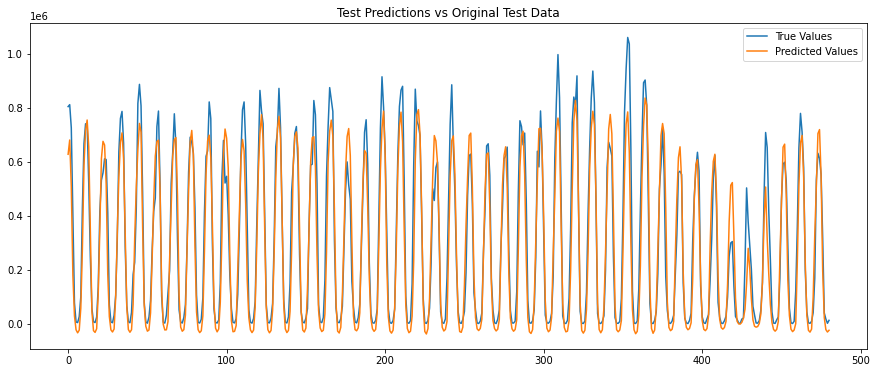

In [30]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()